<a href="https://colab.research.google.com/github/Psomi/Data-Analysis_practice/blob/main/Diabetes_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.random.seed(20220324)

import os

import hashlib
import urllib.request

import pandas as pd

#### Include any librarys you need to import here ###
from pandas import DataFrame
#### Include any librarys you need to import here ###

# Prepare the Dataset

We will be using a publicly open diabetes dataset.

We thank BRFSS 2015 organizers for preparing the dataset and Alex Teboul for cleaning it.

Please refer to this [link](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) for more information on the dataset (e.g., descriptions of each column).

In [ ]:
## DO NOT EDIT THIS CODE ###
DATA_URL = 'https://raw.githubusercontent.com/wltjr1007/wltjr1007.github.io/master/class_datasets/diabetes.csv'
DATA_MD5 = '0c84b09d240b72e8180bceff3965d1bd'
DATA_PATH = '/content/diabetes.csv'
def fetch_diabetes_data():
    def download_data_from_url():
        urllib.request.urlretrieve(DATA_URL, DATA_PATH)
    
    def check_data_consistency():
        with open("diabetes.csv", "rb") as f:
            data = f.read()
        assert hashlib.md5(data).hexdigest()==DATA_MD5, "Data is not correct. Reset Colab using Ctrl+F12 and rerun this code."

    if not os.path.exists(DATA_PATH):
        download_data_from_url()
    check_data_consistency()
    print("Data is fetched!")

fetch_diabetes_data()

all_data = pd.read_csv(DATA_PATH)
all_data_size = len(all_data)

missing_data = all_data.to_numpy().copy()

for i in np.random.choice(all_data_size, 1000):
    j = np.random.randint(0,22)
    missing_data[i,j] = np.nan


## DO NOT EDIT THIS CODE ###

Data is fetched!


In [ ]:
all_data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

- There are 253680 datas.
- No null values
- No non-numeric values

In [ ]:
all_data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Task 1: Draw the histogram of "BMI" feature (1pts).

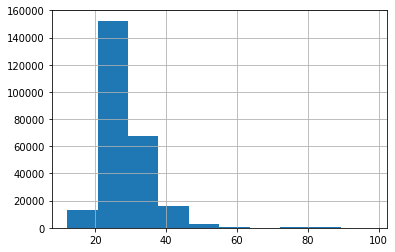

In [ ]:
# Your Code Starts Here
import matplotlib.pyplot as plt
all_data["BMI"].hist()
plt.show()
# Your Code Ends Here

### Task 2: Missing data imputation (4pts)

1. impute_data_zero: Replace NaN values of "missing_data" into 0 (1 pts).
2. impute_data_mean : Replace NaN values of "missing_data" into feature-wise mean of "impute_data_zero" (3pts).

In [ ]:
#Check whether there is NaN value in missing_data
df=pd.DataFrame(missing_data)
df.isna().sum()   # 1000 NaN values

0     43
1     44
2     43
3     59
4     45
5     39
6     46
7     56
8     46
9     50
10    46
11    33
12    37
13    42
14    48
15    34
16    57
17    32
18    50
19    48
20    52
21    50
dtype: int64

In [ ]:
#change NaN -> 0
impute_data_zero=np.where(np.isnan(missing_data),0,missing_data)
df2=pd.DataFrame(impute_data_zero)
df2.isna().sum()    #no NaN value

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64

In [ ]:
# find feature_mean and find NaN
feature_mean=np.nanmean(missing_data,axis=0)
inds=np.where(np.isnan(missing_data))
# place feature mean in inds
missing_data[inds]=np.take(feature_mean,inds[1])
impute_data_mean=missing_data

In [ ]:
# Check whether there is NaN in impute_data_mean
df3=pd.DataFrame(impute_data_mean)
df3.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
dtype: int64

In [ ]:
# Your Code Starts Here
# 1. replacing NaN into 0
impute_data_zero=np.where(np.isnan(missing_data),0,missing_data)

# 2. replacing NaN into feature
feature_mean=np.nanmean(missing_data,axis=0)
inds=np.where(np.isnan(missing_data))
missing_data[inds]=np.take(feature_mean,inds[1])
impute_data_mean=missing_data
# Your Code Ends Here

## DO NOT EDIT THIS CODE ###
print("impute_data_zero nan values?:", np.any(np.isnan(impute_data_zero)))
print("impute_data_mean nan values?:", np.any(np.isnan(impute_data_mean)))
## DO NOT EDIT THIS CODE ###

impute_data_zero nan values?: False
impute_data_mean nan values?: False


### Task 3: Split "all_data" into three sets: train_data, valid_data, test_data (4pts).

Specification:

1. Test size should be 20% of all samples (1pts).
1. Validation size should be 2,944 samples (1pts).
1. The rest of the samples should belong to the train dataset (1pts).
1. Create train_label, valid_label, test_label from "Diabetes_012" feature (0.5pts).
1. Drop "Diabetes_012" feature from each data set (0.5pts).


- test = 253680 * 0.2 = 50736
- valid = 2944
- train = 200000

In [ ]:
# train_data, test_data 분리 
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(all_data,test_size=0.2,random_state=40)

# Diabetes_012행을 label로 지정
test_label=test_data['Diabetes_012']

In [ ]:
#아래 코드처럼 랜덤 샘플링 2944개로 시도했으나 샘플링 후 나머지 데이터를 train_data로 지정하는 것이 잘 안 되어서 방법 변경
#valid_data=train_data.sample(n=2944,random_state=123,replace=False)

# 2944개는 valid_data, 그 아래로 200000개는 train_data로 지정
valid_data, train_data = train_data[:2944], train_data[2944:202944]
# Diabetes_012행을 label로 지정
valid_label=valid_data['Diabetes_012']
train_label=train_data['Diabetes_012']


In [ ]:
# data 셋에서 Diabetes_012행을 삭제
for set_ in(train_data, test_data, valid_data):
  set_.drop("Diabetes_012",axis=1,inplace=True)

In [ ]:
# Your Code Starts Here
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(all_data,test_size=0.2,random_state=40)
test_label=test_data['Diabetes_012']

valid_data, train_data = train_data[:2944], train_data[2944:202944]
valid_label=valid_data['Diabetes_012']
train_label=train_data['Diabetes_012']

for set_ in(train_data, test_data, valid_data):
  set_.drop("Diabetes_012",axis=1,inplace=True)

# Your Code Ends Here

## DO NOT EDIT THIS CODE ###
print("Test data size correct:", test_data.shape==(all_data_size*.2, 21))
print("Valid data size correct:", valid_data.shape==(2944,21))
print("Train data size correct:", train_data.shape==(all_data_size-len(test_data)-len(valid_data),21))

print("Test label size correct:", test_label.shape==(all_data_size*.2,))
print("Valid label size correct:", valid_label.shape==(2944,))
print("Train label size correct:", train_label.shape==(all_data_size-len(test_data)-len(valid_data),))
## DO NOT EDIT THIS CODE ###

Test data size correct: True
Valid data size correct: True
Train data size correct: True
Test label size correct: True
Valid label size correct: True
Train label size correct: True


### Task 4: Preprocess train, valid, test datasets (4pts)

1. Replace values of 2 into 1 in labels (i.e., multi-class to binary-class)(1pts)
2. MinMax scale features into 0~1 (e.g., use MinMaxScaler) (3pts)

In [ ]:
# replace 2->1
train_label=train_label.replace(2,1)

In [ ]:
 # check the numbers in train_label
 np.unique(train_label)

array([0., 1.])

In [ ]:
# MinMaxScale
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()
train_data=minmax_scaler.fit_transform(train_data)

In [ ]:
#check min, max
np.min(valid_data)

0.0

In [ ]:
np.max(valid_data)

1.0000000000000002

In [ ]:
np.min(train_data)

0.0

In [ ]:
np.max(train_data)

1.0000000000000002

In [ ]:
np.min(test_data)

0.0

In [ ]:
np.max(test_data)

1.0000000000000002

In [ ]:
# Your Code Starts Here
train_label=train_label.replace(2,1)
valid_label=valid_label.replace(2,1)
test_label=test_label.replace(2,1)

from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()
train_data=minmax_scaler.fit_transform(train_data)
test_data=minmax_scaler.fit_transform(test_data)
valid_data=minmax_scaler.fit_transform(valid_data)

# Your Code Ends Here

## DO NOT EDIT THIS CODE ###
print("Train label correct:", np.unique(train_label)==(0,1))
print("Valid label correct:", np.unique(valid_label)==(0,1))
print("Test label correct:", np.unique(test_label)==(0,1))

print("Train data range correct:", np.max(train_data) == 1. and np.min(train_data)==0.)
print("Valid data range correct:", np.max(valid_data) == 1. and np.min(valid_data)==0.)
print("Test data range correct:", np.max(test_data) == 1. and np.min(test_data)==0.)
## DO NOT EDIT THIS CODE ###

Train label correct: [ True  True]
Valid label correct: [ True  True]
Test label correct: [ True  True]
Train data range correct: False
Valid data range correct: False
Test data range correct: False


### Task 5: Train a model (9pt)

1. Train a model of your choice (4pt)
2. Validate your model on valid_data (1pt)
3. Improve the validation score by finetuning (3pt)
4. Save your model (1pt)

In [ ]:
#KNN modeling
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(train_data,train_label)

KNeighborsClassifier()

In [ ]:
valid_pred=classifier.predict(valid_data)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(valid_label,valid_pred)

In [ ]:
accuracy_score(valid_label,valid_pred)

0.826766304347826

In [ ]:
# fine-tune for KNN
from sklearn.model_selection import GridSearchCV
estimator_KNN=KNeighborsClassifier()
grid_KNN={'n_neighbors' : [3,5,7]}
grid_search_KNN=GridSearchCV(KNeighborsClassifier(), grid_KNN,cv=2)

- weights: check whether adding weights to data points is beneficial or not
  - uniform : no wieght
  - distance: weighs points by the inverse of the distance
- metric : distance metric(minkowski,euclidean)

모두 default(uniform,minkowski)가 더 좋은 변수로 나와서 생략함


In [ ]:
grid_search_KNN.fit(train_data,train_label)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]})

In [ ]:
print(grid_search_KNN.best_params_)

{'n_neighbors': 7}


In [ ]:
final_model=grid_search_KNN.best_estimator_

In [ ]:
valid_pred=final_model.predict(valid_data)
cm=confusion_matrix(valid_label,valid_pred)
accuracy_score(valid_label,valid_pred)

0.8349184782608695

### Task 6: Evaluate your model (5pt)

1. Load your model (1pt)
2. Show that the loaded model's prediction is same as the model in Task 5 using valid_data (3pt)
2. Evaluate your model on test_data (1pt)

In [ ]:
final_model

KNeighborsClassifier(n_neighbors=7)

In [ ]:
valid_pred2=final_model.predict(valid_data)

In [ ]:
valid_pred==valid_pred2

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
test_pred=final_model.predict(test_data)
cm=confusion_matrix(test_label,test_pred)
accuracy_score(test_label,test_pred)

0.833707820876695